## Mount to Drive

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
cd /content/drive/My\ Drive/Colab\ Notebooks

/content/drive/My Drive/Colab Notebooks


## Import Modules

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np

import string
import re
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

## Data Cleaning

In [0]:
from data_cleaning import clean_text

## Data Loading

In [0]:
cd /content/drive/My\ Drive/Colab\ Notebooks/data

/content/drive/My Drive/Colab Notebooks/data


In [0]:
data_file = "reviews_8_categories.txt"
encoding="utf-8"

In [0]:
X, y = [], []
with open(data_file, "r") as infile:
    for line in infile:
        label, text = line.split("\t")
        text = clean_text(text)

        X.append(text)
        y.append(label)

In [0]:
df = pd.DataFrame({"Review": X, "Label":y})

## Sentiment Analysis

In [0]:
df['Sentiment'] = df['Review'].map(lambda text: TextBlob(text).sentiment.polarity)
df.head()

,Review,Label,Sentiment
0,these rings are difficult to install the scope...,sports,0.052000
1,it is great to see ashanti back doing what she...,music,0.354537
2,this series has been packed full of explosive ...,books,0.152500
3,just make sure to buy lots of mantels you do n...,sports,0.500000
4,these wallets are certainly well made but the ...,sports,0.108958


In [0]:
def get_sentiment_examples(sentiment, n=5):
  return df.loc[df['Sentiment'] == sentiment, ['Review']].sample(n).values

### Most negative reviews

In [0]:
get_sentiment_examples(-1, 10)

array([['worst purchase ever save your money and buy a zenmuse hd3d'],
       ["never quite lived up to my expectations but it was set in prague soy'knowbonus points for that i still do not get why the cover had to be so terrible"],
       ['not the greatestnot the worst'],
       ['taste is horrible reminds me of liquid cough medicine from when i was a kid'],
       ['terrible quality the pictures do not transfer on to the skin so the kids ended up with bits and pieces of their tattoos'],
       ['terrible face does not match the body neither does it matches gal gadot'],
       ['just nasty'],
       ['awful'],
       ['nasty tasting'],
       ['awful']], dtype=object)

### Neutral reviews

In [0]:
get_sentiment_examples(0, 10)

array([['everything made for shotguns is made for 12ga i cut a bicycle tube up and modified this to accomodate 16ga works like it supposed to extra ammo where and when you need it'],
       ['xlint'],
       ['they work well - just note that there is a burr on one side from production'],
       ['me encanta este set de boxer ajustado a la medida y confort total lo recomiendo jesus loreto valencia venezuela xd'],
       ['awsome'],
       ['ellie goulding is my preferred artist above madonna beyonce etc'],
       ['error never ordered'],
       ['i may have given in and ordered the next two booksopps'],
       ['i bought this for my niece my sister and her husband blew it up and it survived a toddler for one day then busted'],
       ['my husband died eight years ago and i always considered this our song i will always think of him when i hear it']],
      dtype=object)

### Most positive reviews

In [0]:
get_sentiment_examples(1, 10)

array([['these are the best i have ever ate'],
       ['in one word excellent the best quality of jigsawpuzzles one of the best buys in amazon'],
       ['one of mjs best and creepiest sounding songs but hey mj was a weirdo and his lyrics shows but hey the world didn not care'],
       ['perfect toy'],
       ['excellent song'],
       ['this song is awesome'],
       ['awesome song'],
       ['excellent'],
       ['best salads ever i tell everyone to buy them'],
       ['awesome']], dtype=object)

## Word count

Most utterances are under 500 words in length. There are exceptions with about 3500 words.

Text(0.5, 0, 'Number of words')

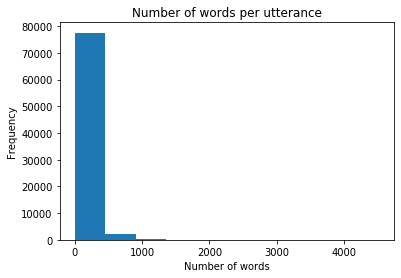

In [0]:
df['Word count'] = df['Review'].apply(lambda x: len(str(x).split()))

plt.hist(df['Word count'], bins=10)
plt.title("Number of words per utterance")
plt.ylabel('Frequency')
plt.xlabel('Number of words')

## Sentiment and Word Count per Category 
On average, **book reviews are the longest and most negative**, while **music reviews are the shortest and most positive**.

In [0]:
df.groupby('Label').mean()

,Sentiment,Word count
Label,,
books,0.176161,198.2522
clothing,0.253568,60.6247
food,0.351199,38.7687
instruments,0.332483,57.2598
movies,0.217940,165.5668
music,0.419204,31.4948
sports,0.226197,89.1470
toys,0.307194,42.1148


## BoW and TFIDF n-grams

In [0]:
def get_top_ngrams(corpus, criteria, ngram_range, stop_words='english', n=10):
    corpus = corpus['Review']
    assert criteria == 'bow' or criteria == 'tfidf', "Invalid criteria"
    if criteria == 'bow':
      vec = CountVectorizer(ngram_range=ngram_range, stop_words=stop_words).fit(corpus)
    elif criteria == 'tfidf':
      vec = TfidfVectorizer(ngram_range=ngram_range, stop_words=stop_words).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, round(sum_words[0, idx], 2)) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

### Most common **BoW** n-grams in all the reviews

In [0]:
top_BoW_unigrams_all = get_top_ngrams(df, 'bow', (1,1))
top_BoW_bigrams_all = get_top_ngrams(df, 'bow', (2,2))
print(f"Top BoW unigrams - All reviews:\n{top_BoW_unigrams_all}\n\nTop BoW bigrams - All reviews:\n{top_BoW_bigrams_all}")

Top BoW unigrams - All reviews:
[('like', 28789), ('just', 24695), ('great', 24215), ('good', 22628), ('book', 20344), ('love', 18602), ('really', 18426), ('time', 13496), ('movie', 12055), ('does', 11779)]

Top BoW bigrams - All reviews:
[('year old', 2126), ('highly recommend', 1177), ('really like', 1061), ('feel like', 1060), ('read book', 967), ('hide spoiler', 920), ('good quality', 901), ('felt like', 894), ('long time', 875), ('works great', 842)]


### Most common **TFIDF** n-grams in all the reviews

In [0]:
top_tfidf_unigrams_all = get_top_ngrams(df, 'tfidf', (1,1))
top_tfidf_bigrams_all = get_top_ngrams(df, 'tfidf', (2,2))
print(f"Top TFIDF unigrams - All reviews:\n{top_tfidf_unigrams_all}\n\nTop TFIDF bigrams - All reviews:\n{top_tfidf_bigrams_all}")

Top TFIDF unigrams - All reviews:
[('great', 2918.32), ('good', 2348.09), ('love', 2108.69), ('song', 1646.93), ('like', 1616.45), ('just', 1352.13), ('really', 1133.75), ('book', 1063.47), ('nice', 1003.56), ('product', 890.74)]

Top TFIDF bigrams - All reviews:
[('great song', 441.42), ('love song', 266.7), ('great product', 199.77), ('year old', 196.11), ('works great', 178.17), ('good song', 170.1), ('good quality', 163.87), ('great price', 146.36), ('good product', 122.11), ('highly recommend', 117.47)]


## Top N-grams per Category

In [0]:
def get_reviews_by_label(label, dataframe=df):
  return dataframe.loc[dataframe['Label'] == label]

In [0]:
def print_ngrams_by_label(label):
    reviews_df = get_reviews_by_label(label)

    unigrams = get_top_ngrams(reviews_df, 'tfidf', (1,1))
    bigrams = get_top_ngrams(reviews_df, 'tfidf', (2,2))

    print(f"Unigrams: {unigrams}\n\nBigrams: {bigrams}")

### Book reviews: most common n-grams

In [0]:
print_ngrams_by_label('books')

Unigrams: [('book', 527.0), ('read', 322.41), ('really', 273.04), ('just', 271.96), ('story', 270.14), ('like', 268.43), ('love', 237.0), ('series', 213.46), ('characters', 196.95), ('good', 193.95)]

Bigrams: [('review come', 53.32), ('read book', 38.24), ('hide spoiler', 36.02), ('loved book', 30.17), ('felt like', 30.07), ('really enjoyed', 27.57), ('main character', 26.59), ('feel like', 25.9), ('really liked', 25.85), ('35 stars', 25.15)]


### Movie reviews: most common n-grams

In [0]:
print_ngrams_by_label('movies')

Unigrams: [('movie', 456.76), ('film', 264.49), ('good', 246.5), ('great', 243.93), ('like', 200.51), ('just', 178.59), ('story', 175.85), ('love', 170.71), ('watch', 166.61), ('dvd', 158.04)]

Bigrams: [('good movie', 32.63), ('great movie', 32.58), ('blu ray', 26.48), ('story line', 21.64), ('special effects', 21.01), ('highly recommend', 19.83), ('love movie', 19.5), ('movie good', 17.65), ('sci fi', 16.84), ('movie great', 16.52)]


### Food & Groceries reviews: most common n-grams

In [0]:
print_ngrams_by_label('food')

Unigrams: [('good', 504.34), ('great', 490.1), ('love', 328.92), ('taste', 261.69), ('like', 248.02), ('product', 231.96), ('flavor', 219.53), ('coffee', 211.54), ('delicious', 184.66), ('tea', 174.85)]

Bigrams: [('great product', 64.96), ('great taste', 41.0), ('good product', 40.77), ('great price', 34.03), ('good stuff', 32.09), ('taste great', 31.72), ('good price', 28.41), ('taste good', 28.29), ('tastes great', 27.48), ('good flavor', 26.58)]


### Music reviews: most common n-grams

In [0]:
print_ngrams_by_label('music')

Unigrams: [('song', 937.82), ('great', 895.62), ('love', 759.11), ('good', 529.02), ('music', 340.24), ('like', 283.05), ('songs', 190.59), ('awesome', 167.81), ('album', 154.69), ('just', 153.79)]

Bigrams: [('great song', 417.94), ('love song', 244.54), ('good song', 164.15), ('great music', 65.06), ('good music', 61.35), ('like song', 52.05), ('awesome song', 49.44), ('song great', 34.46), ('love music', 32.94), ('song love', 32.38)]


### Musical instrument reviews: most common n-grams

In [0]:
print_ngrams_by_label('instruments')

Unigrams: [('great', 526.3), ('good', 402.7), ('works', 282.87), ('strings', 257.75), ('guitar', 221.37), ('nice', 217.93), ('price', 213.46), ('sound', 208.92), ('product', 198.98), ('quality', 185.66)]

Bigrams: [('works great', 106.66), ('great product', 57.49), ('good quality', 48.61), ('great price', 47.3), ('good product', 42.47), ('great strings', 36.78), ('good price', 35.22), ('does job', 32.04), ('easy use', 26.22), ('work great', 25.46)]


### Clothing reviews: most common n-grams

In [0]:
print_ngrams_by_label('clothing')

Unigrams: [('great', 288.05), ('fit', 275.48), ('size', 272.68), ('like', 261.3), ('wear', 254.55), ('love', 252.81), ('good', 232.79), ('comfortable', 228.76), ('just', 213.97), ('shoes', 198.15)]

Bigrams: [('true size', 37.62), ('good quality', 31.01), ('really like', 25.86), ('fit perfectly', 23.35), ('looks great', 22.34), ('fit great', 21.7), ('highly recommend', 21.58), ('just right', 21.21), ('look great', 19.72), ('look like', 18.9)]


### Sports & Gym reviews: most common n-grams

In [0]:
print_ngrams_by_label('sports')

Unigrams: [('great', 253.84), ('good', 223.88), ('use', 199.95), ('like', 192.34), ('just', 182.01), ('knife', 159.78), ('easy', 143.97), ('price', 142.83), ('works', 141.24), ('does', 138.53)]

Bigrams: [('works great', 36.14), ('highly recommend', 24.81), ('good quality', 24.62), ('easy install', 20.91), ('easy use', 18.36), ('high quality', 17.07), ('great price', 16.9), ('great product', 16.86), ('just fine', 16.42), ('light weight', 15.25)]


### Toys & Games reviews: most common n-grams

In [0]:
print_ngrams_by_label('toys')

Unigrams: [('great', 427.75), ('love', 307.34), ('loves', 283.9), ('good', 267.03), ('fun', 219.72), ('old', 218.51), ('loved', 218.31), ('cute', 208.84), ('kids', 197.69), ('year', 188.26)]

Bigrams: [('year old', 117.7), ('kids love', 59.75), ('daughter loves', 55.45), ('grandson loves', 50.7), ('son loves', 50.08), ('great product', 45.51), ('grandson loved', 39.81), ('good quality', 38.34), ('old loves', 37.12), ('kids loved', 32.73)]
